Il existe 2 types de système de recommandation :

- un basé sur "Content-based" 

Le système va suggéré des elements similaires à ceux déjà vu

- un basé sur "Collaborative filtering"

Le système va essayer de prédire les préférences d'un utilisateur en se basant sur les préférences d'utilisateur ressemblant.
Il fonctionne en recherchant un grand groupe de personnes et en trouvant un plus petit nombre d'utilisateurs ayant des goûts similaires à ceux d'un utilisateur particulier. Il examine les éléments qu'ils aiment et les combine pour créer une liste classée de suggestions.
-  '+' :
-  '-' : nécessite un grand nombre d'utilisateurs pour fonctionner

- collaborative filtering needs large dataset with active users who rated a product before in order to make accurate predictions.
- content-based filtering can recommend a new item, but needs more data of user preference in order to incorporate best match.

https://www.dezyre.com/article/recommender-systems-python-methods-and-algorithms/413

## Collaborative filtering

In most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available. A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?

One important thing to keep in mind is that in an approach based purely on collaborative filtering, the similarity is not calculated using factors like the age of users, genre of the movie, or any other data about users or items. It is calculated only on the basis of the rating (explicit or implicit) a user gives to an item. For example, two users can be considered similar if they give the same ratings to ten movies despite there being a big difference in their age.

**Metrique :**

One of the approaches to measure the accuracy of your result is the Root Mean Square Error (RMSE), in which you predict ratings for a test dataset of user-item pairs whose rating values are already known. The difference between the known value and the predicted value would be the error. Square all the error values for the test set, find the average (or mean), and then take the square root of that average to get the RMS

Another metric to measure the accuracy is Mean Absolute Error (MAE), in which you find the magnitude of error by finding its absolute value and then taking the average of all error values.

**Algorithme**

## Memory based (algorithme conseillé : Kmeans)

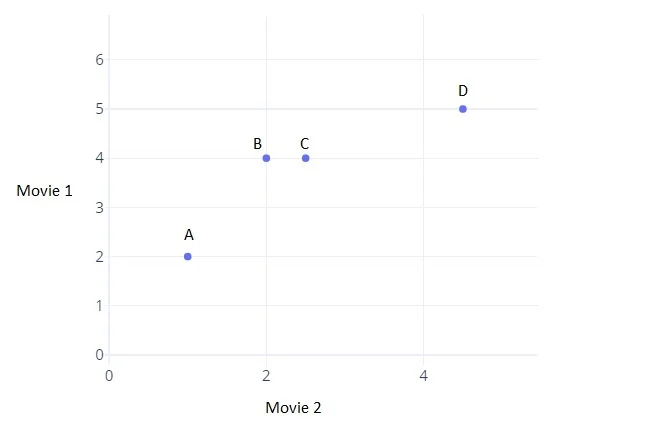

In [2]:
from scipy import spatial

a = [1, 2]
b = [2, 4]
c = [2.5, 4]
d = [4.5, 5]

In [3]:
spatial.distance.euclidean(c, a)

2.5

In [4]:
spatial.distance.euclidean(c, b)

0.5

In [5]:
spatial.distance.euclidean(c, d)

2.23606797749979

In [ ]:
>>> from scipy import spatial
>>> a = [1, 2]
>>> b = [2, 4]
>>> c = [2.5, 4]
>>> d = [4.5, 5]

>>> spatial.distance.cosine(c,a)
0.004504527406047898

>>> spatial.distance.cosine(c,b)
0.004504527406047898

>>> spatial.distance.cosine(c,d)
0.015137225946083022

>>> spatial.distance.cosine(a,b)
0.0

cosinus similarité centré sur 0 pour supprimer les biais

## Model based (algorithme conseillé :  SVD)

Avec surprise

In [1]:
# load_data.py

import pandas as pd
from surprise import Dataset
from surprise import Reader

# This is the same data that was plotted for similarity earlier
# with one new user "E" who has rated only movie 1
ratings_dict = {
    "item": [1, 2, 1, 2, 1, 2, 1, 2, 1],
    "user": ['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D', 'E'],
    "rating": [1, 2, 2, 4, 2.5, 4, 4.5, 5, 3],
}

df = pd.DataFrame(ratings_dict)
reader = Reader(rating_scale=(1, 5))

# Loads Pandas dataframe
data = Dataset.load_from_df(df[["user", "item", "rating"]], reader)
# Loads the builtin Movielens-100k data
movielens = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] 

 Y


Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\Nemo/.surprise_data/ml-100k


In [2]:
# recommender.py

from surprise import KNNWithMeans

# To use item-based cosine similarity
sim_options = {
    "name": "cosine",
    "user_based": False,  # Compute  similarities between items
}
algo = KNNWithMeans(sim_options=sim_options)

In [5]:


trainingSet = data.build_full_trainset()

algo.fit(trainingSet)




Computing the cosine similarity matrix...
Done computing similarity matrix.


In [6]:
prediction = algo.predict('E', 2)
prediction.est

4.15

In [7]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")
sim_options = {
    "name": ["msd", "cosine"],
    "min_support": [3, 4, 5],
    "user_based": [False, True],
}

param_grid = {"sim_options": sim_options}

gs = GridSearchCV(KNNWithMeans, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [8]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin("ml-100k")

param_grid = {
    "n_epochs": [5, 10],
    "lr_all": [0.002, 0.005],
    "reg_all": [0.4, 0.6]
}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.9649006959524046
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
